In [ ]:
# Day 2 Goals
- Run alignment job for at least 1 sample
- Load counts/TPM matrices into R and practice matrix manipulation, subsetting, etc. 
- Practice making plots with `ggplot2`
- Identify differentially expressed genes in a dataset

# Bulk RNA-seq analysis

Yesterday we got started working on HPC, learning Unix commands, and running bash scripts. That is a lot to do in just a few hours, so we expect that today we will also be working on navigating the command line and aligning reads. We can answer questions and troubleshoot altogether if many people have similar questions, and/or some of us can break out into small groups to address specific questions.

There are a few more steps post-alignment we need to do in order to get our gene-by-sample counts matrices. We want to make sure to touch on everyone's interests as much as possible (and give you the tools needed to start thinking about your projects!), so we have pre-made counts matrices so we can get started on secondary analysis and plotting.

### Log in
https://hpc3.rcic.uci.edu/biojhub3/ 

## Option 1: Download pre-made counts matrix and TPM matrix

If you need them, copy the counts and TPM matrices from my public directory to your home directory.

```
cp /pub/erebboah/cosmos/FSHD_bulkRNA/kallisto_counts/fshd.counts.matrix.csv .
cp /pub/erebboah/cosmos/FSHD_bulkRNA/kallisto_counts/fshd.tpm.matrix.csv .
```

## Option 2: Build matrices from kallisto output
Fairlie can teach you how to merge all the individual abundance matrices together and convert the transcripts to genes.

# Analyze data in R

In [31]:

tpm = as.matrix(read.csv("fshd.tpm.matrix.csv", row.names = 1))
counts = as.matrix(read.csv("fshd.counts.matrix.csv", row.names = 1))

In [32]:
head(tpm,10)
head(counts)
dim(tpm)

,Control_78_Day_0_Rep3,Control_78_Day_0_Rep4,Control_78_Day_3_Rep1,Control_78_Day_3_Rep2,FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep2,FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep2
ENSG00000223972.5|DDX11L1,0,0,0,0,0,0,0,0
ENSG00000227232.5|WASH7P,0,1,0,1,0,0,0,1
ENSG00000278267.1|MIR6859-1,0,0,2,3,0,0,0,1
ENSG00000243485.5|MIR1302-2HG,0,0,0,0,0,0,0,0
ENSG00000284332.1|MIR1302-2,0,0,0,0,0,0,0,0
ENSG00000237613.2|FAM138A,0,0,0,0,0,0,0,1
ENSG00000268020.3|OR4G4P,0,0,0,0,0,0,0,0
ENSG00000240361.2|OR4G11P,0,0,0,0,0,0,0,0
ENSG00000186092.6|OR4F5,0,0,0,0,0,0,0,0
ENSG00000238009.6|AL627309.1,0,0,0,1,0,0,0,1


,Control_78_Day_0_Rep3,Control_78_Day_0_Rep4,Control_78_Day_3_Rep1,Control_78_Day_3_Rep2,FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep2,FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep2
ENSG00000223972.5|DDX11L1,0,2,0,0,0,0,0,0
ENSG00000227232.5|WASH7P,6,20,6,13,9,6,0,14
ENSG00000278267.1|MIR6859-1,0,0,0,0,0,0,0,0
ENSG00000243485.5|MIR1302-2HG,0,0,0,0,0,0,0,0
ENSG00000284332.1|MIR1302-2,0,0,0,0,0,0,0,0
ENSG00000237613.2|FAM138A,0,0,1,0,3,0,0,4


[1] 59429     8

We have 59,429 genes by 8 samples. The python script outputs both the Ensembl gene ID and the gene name separated by "|"; let's grab the gene name to be more human readable.

In [33]:
library(stringr)

In [34]:
gene_name = sapply(strsplit(rownames(tpm), "[|]"), "[[", 2) # string manipulation using | as a separator
head(gene_name)

[1] "DDX11L1"     "WASH7P"      "MIR6859-1"   "MIR1302-2HG" "MIR1302-2"  
[6] "FAM138A"

In [35]:
# Change gene names in rownames 
rownames(tpm) = gene_name
head(tpm) # much better
rownames(counts) = gene_name
head(counts)

,Control_78_Day_0_Rep3,Control_78_Day_0_Rep4,Control_78_Day_3_Rep1,Control_78_Day_3_Rep2,FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep2,FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep2
DDX11L1,0,0,0,0,0,0,0,0
WASH7P,0,1,0,1,0,0,0,1
MIR6859-1,0,0,2,3,0,0,0,1
MIR1302-2HG,0,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,1


,Control_78_Day_0_Rep3,Control_78_Day_0_Rep4,Control_78_Day_3_Rep1,Control_78_Day_3_Rep2,FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep2,FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep2
DDX11L1,0,2,0,0,0,0,0,0
WASH7P,6,20,6,13,9,6,0,14
MIR6859-1,0,0,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0
FAM138A,0,0,1,0,3,0,0,4


In [36]:
### Filter out genes with 0 count
tpm = tpm[rowSums(tpm[])>0,]
dim(tpm)

[1] 23215     8

59,429 genes sounds like a lot-- probably because many aren't expressed, such as predicted genes. We can filter out rows containing all 0 values using the `rowSums()` function.

### PCA and outlier removal
We'll use the TPM matrix to perform principal component analysis ([PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)).

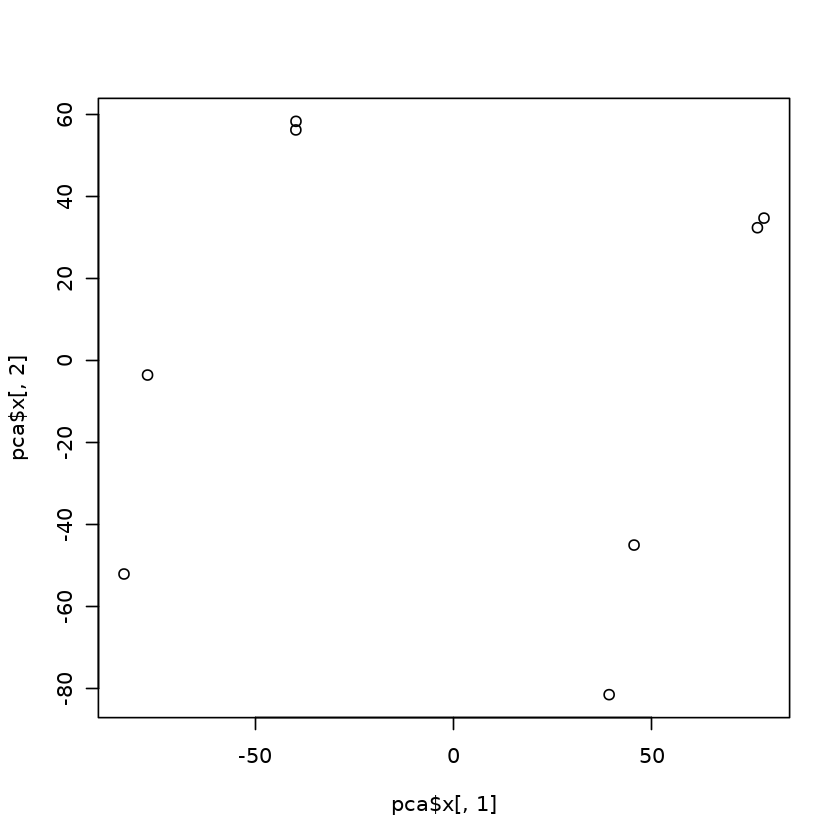

In [37]:
# Run PCA algorithm and plot
pca <- prcomp(t(log2(tpm+1)))
# Plot PCA1 and PCA2
plot(pca$x[,1], pca$x[,2])

We can make a fancier PCA plot with `ggplot`.

In [38]:
# Grab x from pca output
pca_out <- as.data.frame(pca$x)

# Get percent variance explained for x and y axes
percentage <- round(pca$sdev/sum(pca$sdev) * 100, 2)
percentage <- paste0(colnames(pca_out), " (", paste0(as.character(percentage), "%", ")"))

In [39]:
# Use column names and string manipulation to make metadata
pca_out$Sample <- colnames(counts)
pca_out$Genotype <- sapply(strsplit(colnames(counts), "_"), "[[", 1)
pca_out$Timepoint <- sapply(strsplit(colnames(counts), "_"), "[[", 4)
pca_out$Replicate <- sapply(strsplit(colnames(counts), "_"), "[[", 5)

In [40]:
head(pca_out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Sample,Genotype,Timepoint,Replicate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Control_78_Day_0_Rep3,-39.75770,58.424156,6.009092,-33.29511,6.970520,-5.041178,38.55332823,4.043007e-13,Control_78_Day_0_Rep3,Control,0,Rep3
Control_78_Day_0_Rep4,-39.78970,56.326503,4.629316,-31.83290,3.969584,6.683192,-39.71799901,5.675863e-13,Control_78_Day_0_Rep4,Control,0,Rep4
Control_78_Day_3_Rep1,78.36891,34.804030,15.415244,28.06878,-9.389829,39.275203,5.63908524,6.459737e-13,Control_78_Day_3_Rep1,Control,3,Rep1
Control_78_Day_3_Rep2,76.70951,32.459169,11.244010,26.84125,5.220904,-41.461954,-5.81311931,6.210646e-13,Control_78_Day_3_Rep2,Control,3,Rep2
FSHD2_19_Day_0_Rep1,-83.16832,-52.046935,39.323842,30.92150,29.882253,3.741797,-0.08709561,1.495540e-13,FSHD2_19_Day_0_Rep1,FSHD2,0,Rep1
FSHD2_19_Day_0_Rep2,-77.22088,-3.489036,-43.225418,29.06080,-38.661766,-4.878617,0.93994055,9.044120e-13,FSHD2_19_Day_0_Rep2,FSHD2,0,Rep2


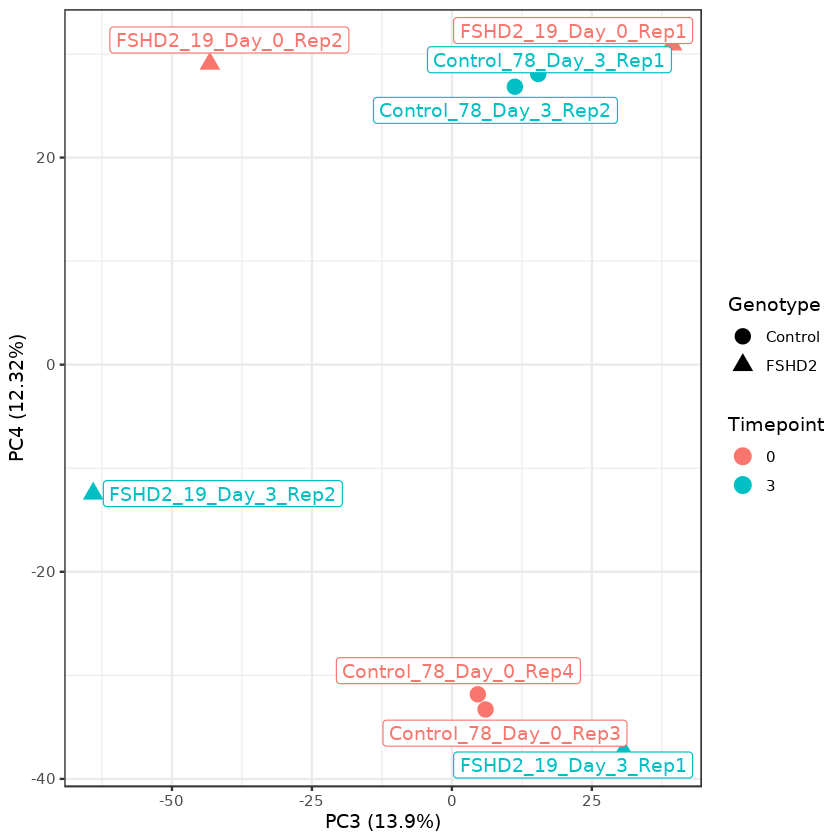

In [41]:
library(ggplot2)
library(ggrepel)
library(factoextra)
library(tidyverse)

# Labels are sample, colors are timepoint
p = ggplot(pca_out,aes(x=PC3,y=PC4,color=Timepoint))+
  geom_point(aes(shape=Genotype),size=4) + 
  xlab(percentage[3]) + ylab(percentage[4]) +
  geom_label_repel(aes(label = Sample),
                   box.padding   = 0.35, 
                   point.padding = 0.5,
                   segment.color = 'grey50',
                   show.legend=FALSE) +
  theme_bw()
print(p)

Looks like PC1 primarily separates day 0 and day 3 samples and explains slightly more variance than PC2, which separates control and FSHD2. Let's make another PCA plot but change the [colors](https://colorbrewer2.org/) and size of the points:

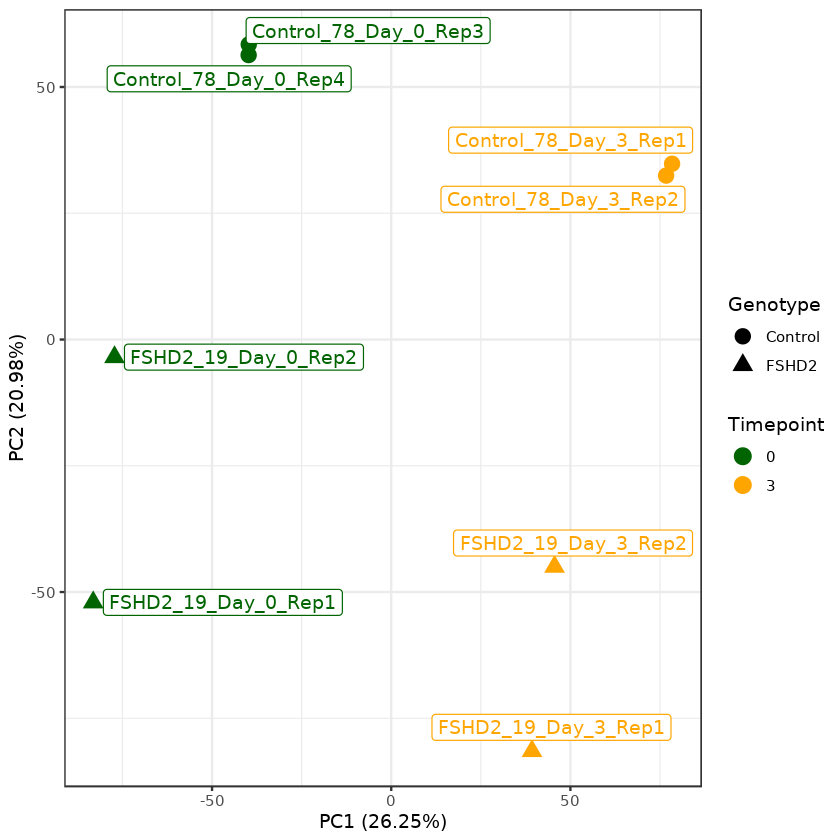

In [42]:
p = ggplot(pca_out,aes(x=PC1,y=PC2,color=Timepoint))+
  geom_point(aes(shape=Genotype),size=4) + 
  xlab(percentage[1]) + ylab(percentage[2]) +
  geom_label_repel(aes(label = Sample), 
                   box.padding   = 0.35, 
                   point.padding = 0.5,
                   segment.color = 'grey50',
                   show.legend=FALSE) +
  theme_bw() + scale_color_manual(values=c("darkgreen", "orange"))
print(p)

Save figure to a PDF! Make a figures directory if you haven't done so:

In [43]:
ggsave(file = "PCA_FSHD.pdf",
    width = 8, 
    height = 5)
dev.off()

null device 
          1

In [44]:
res.var <- get_pca_var(pca)
head(res.var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8
WASH7P,0.0006776265,4.684588e-04,0.0029443426,0.0006247551,0.008485402,0.0071793512,2.076064e-02,0.864914930
MIR6859-1,0.0104017190,1.377058e-03,0.0003727557,0.0150895269,0.003650133,0.0018914634,5.230188e-05,9.364360328
FAM138A,0.0002068139,4.941550e-04,0.0052031629,0.0003183337,0.005004628,0.0002875695,1.838620e-06,0.620448130
AL627309.1,0.0014889641,3.831454e-05,0.0035371284,0.0004252851,0.006869893,0.0108726296,2.962899e-04,0.002250488
AL627309.3,0.0005937719,2.972555e-06,0.0023683605,0.0017343088,0.008083713,0.0002034757,9.014898e-06,9.342974367
CICP27,0.0001976897,4.141122e-04,0.0046777384,0.0013558589,0.004078887,0.0123291587,1.984915e-02,37.826787136


In [45]:
#### Function to extract Dimension
PCA_extract <- function(y){
res.var <- get_pca_var(pca)
res.var <- res.var$contrib
res.var <- res.var[order(-res.var[,y]),]
PCA <- res.var %>%
  as.data.frame %>% 
  head(50, by = y) 
PCA$gene_clean <-rownames(PCA)
}

In [46]:
## Extract Dimension
PCA_1 <- PCA_extract("Dim.1")
PCA_2 <- PCA_extract("Dim.2")
head(PCA_1,50)

[1] "MYLPF"      "ACTA1"      "TNNC2"      "TNNT3"      "TNNI1"     
 [6] "MYL1"       "CKM"        "TNNC1"      "COX6A2"     "MYH3"      
[11] "MYL4"       "MYL2"       "MYBPH"      "MYMK"       "ACTN2"     
[16] "MYOG"       "MRLN"       "TTN"        "TNNI2"      "CASQ2"     
[21] "FABP3"      "CACNG1"     "HRC"        "NMRK2"      "MEF2C"     
[26] "SMPX"       "SLN"        "TNNT2"      "APOBEC2"    "F13A1"     
[31] "PGAM2"      "CAVIN4"     "MYH8"       "MYH7"       "AIF1L"     
[36] "MYBPC2"     "LDB3"       "FOLR1"      "AC020909.2" "IL17B"     
[41] "SMYD1"      "CSRP3"      "C1orf105"   "UNC45B"     "ITGB1BP2"  
[46] "SAA1"       "TNNT1"      "LANCL1.AS1" "ENO3"       "ARPP21"

In [47]:
head(PCA_2,50)

[1] "AL139099.4" "RN7SL1"     "RN7SL2"     "RN7SL3"     "AC092069.1"
 [6] "MIR663A"    "MT1P3"      "RPS2P5"     "RPL13P12"   "AC015674.1"
[11] "SAA1"       "TRBJ2.2P"   "VTRNA1.2"   "RN7SL767P"  "TRBJ2.3"   
[16] "RTN1"       "AC104692.1" "AL365357.1" "MIR663AHG"  "BGN"       
[21] "PSPHP1"     "MFAP2"      "KHDC1L"     "RN7SL674P"  "AC078927.1"
[26] "SNORA67"    "SAA2"       "AC021097.2" "RN7SL5P"    "SPHK1"     
[31] "SEPT9"      "EVA1B"      "AC011558.1" "TFPI2"      "DCN"       
[36] "RN7SL128P"  "SNORD59A"   "BCL6"       "RNF5P1"     "RN7SL4P"   
[41] "TRBC2"      "MIR198"     "MTRNR2L1"   "RRM2"       "MBD3L3"    
[46] "AC242842.2" "FXYD6"      "RN7SL396P"  "MT.RNR1"    "APOE"

# Excercise 1

In [ ]:
### 1) Plot PCA3 and PCA4 

### 2) Extract genes for PCA3 and PCA4


### Run differential expression analysis

In [48]:
library(edgeR)

Loading required package: limma



In [49]:
# We need a metadata file -- basically already made it earlier with stringsplit operations
meta = pca_out[,c("Sample","Timepoint","Genotype","Replicate")]
head(meta,8)

,Sample,Timepoint,Genotype,Replicate
,<chr>,<chr>,<chr>,<chr>
Control_78_Day_0_Rep3,Control_78_Day_0_Rep3,0,Control,Rep3
Control_78_Day_0_Rep4,Control_78_Day_0_Rep4,0,Control,Rep4
Control_78_Day_3_Rep1,Control_78_Day_3_Rep1,3,Control,Rep1
Control_78_Day_3_Rep2,Control_78_Day_3_Rep2,3,Control,Rep2
FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep1,0,FSHD2,Rep1
FSHD2_19_Day_0_Rep2,FSHD2_19_Day_0_Rep2,0,FSHD2,Rep2
FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep1,3,FSHD2,Rep1
FSHD2_19_Day_3_Rep2,FSHD2_19_Day_3_Rep2,3,FSHD2,Rep2


#### Set up EdgeR function

In [50]:
### Make groups
group <- factor(str_sub(meta$Sample, end=-6))
z <- tpm
### read count matrix into DGEList
y=DGEList(counts=z, group=group)
design <- model.matrix(~0+group, data=y$samples)
colnames(design) <- levels(y$samples$group)
head(design)

,Control_78_Day_0,Control_78_Day_3,FSHD2_19_Day_0,FSHD2_19_Day_3
Control_78_Day_0_Rep3,1,0,0,0
Control_78_Day_0_Rep4,1,0,0,0
Control_78_Day_3_Rep1,0,1,0,0
Control_78_Day_3_Rep2,0,1,0,0
FSHD2_19_Day_0_Rep1,0,0,1,0
FSHD2_19_Day_0_Rep2,0,0,1,0


In [51]:
### Calculation
y=estimateCommonDisp(y)

y=estimateTagwiseDisp(y)

fit <- glmQLFit(y, design)

In [52]:
EdgeR_func_GLM <- function(w){

Contrast <- makeContrasts(contrasts=w, levels=design)
qlf <- glmQLFTest(fit, contrast=Contrast)
result <- topTags(qlf,n=10000000) 
table <- as.data.frame(result)
### Select cut off
top_up <- subset(as.data.frame(result), PValue < 0.01 & logFC > 1.5)
top_genes_up <- as.data.frame(subset(tpm, row.names(tpm) %in% row.names(top_up)))

top_down <- subset(as.data.frame(result), PValue < 0.01 & logFC < -1.5)
top_genes_down <- as.data.frame(subset(tpm, row.names(tpm) %in% row.names(top_down)))
### Up Gene
top_genes_up$gene_name <- rownames(top_genes_up)
top_up$gene_name <- rownames(top_up)
### Down Gene
top_genes_down$gene_name <- rownames(top_genes_down) 
top_down$gene_name <- rownames(top_down)
### Make table
top_up <-left_join(top_up, dplyr::select(top_genes_up,gene_name), by = 'gene_name')
top_down <-left_join(top_down, dplyr::select(top_genes_down,gene_name), by = 'gene_name')
output<-list("Up"= top_up, "Down" = top_down,"table"=table)
return(output)
}

In [73]:
#### Make comparison
#### Compare Control vs FSHD
result <- EdgeR_func_GLM("Control_78_Day_3-Control_78_Day_0") #### FSHD first:positve mean upregulated in FSHD
Control_3_up <- result$Up$gene_name
Control_3_down <- result$Down$gene_name
Control_3_table <- result$table

In [54]:
head(Control_3_table,10)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TNNC1,-6.792722,11.618347,833.2519,7.632833e-07,0.01771962
RPS2P5,-6.080215,5.376727,402.8481,4.792103e-06,0.03187472
DCN,-3.043476,10.331454,374.4096,5.762517e-06,0.03187472
MYBPH,-6.348049,10.797413,336.6965,7.527174e-06,0.03187472
MYLPF,-7.952097,13.015313,324.2196,8.276741e-06,0.03187472
MILR1,-2.756858,3.509491,283.5231,1.159119e-05,0.03187472
PRELP,-3.700281,2.616408,627.4053,1.232638e-05,0.03187472
PRPF19,3.730899,4.616440,273.1385,1.272827e-05,0.03187472
COX7A1,-2.170236,8.331473,265.1958,1.370547e-05,0.03187472


# Excercise 2

### Compare FSHD2 to Control Day 0

# Day 3: Data Visualization 

### Last week we learned how to read count matrix from RNA-seq Kalisto output and perform differential analysis
### Goals: We will visualize data by making plots today.
### Some of the common plots we make: volcano plot, heatmap, barplot, boxplot, violin plot
### Plots help us see the patterns in our data

In [56]:
### Load package
library(ggplot2)

## Volcano plot

#### Make table for plotting

In [ ]:
plot_table <- Control_3_table %>% 
  mutate(Categories = ifelse(logFC >= 1.0 & PValue <  0.01,"High in FSHD", 
    ifelse(logFC<= -1.0 & PValue <  0.01 , "Low in FSHD", "No Changes")))
head(plot_table,50)

#### Plot

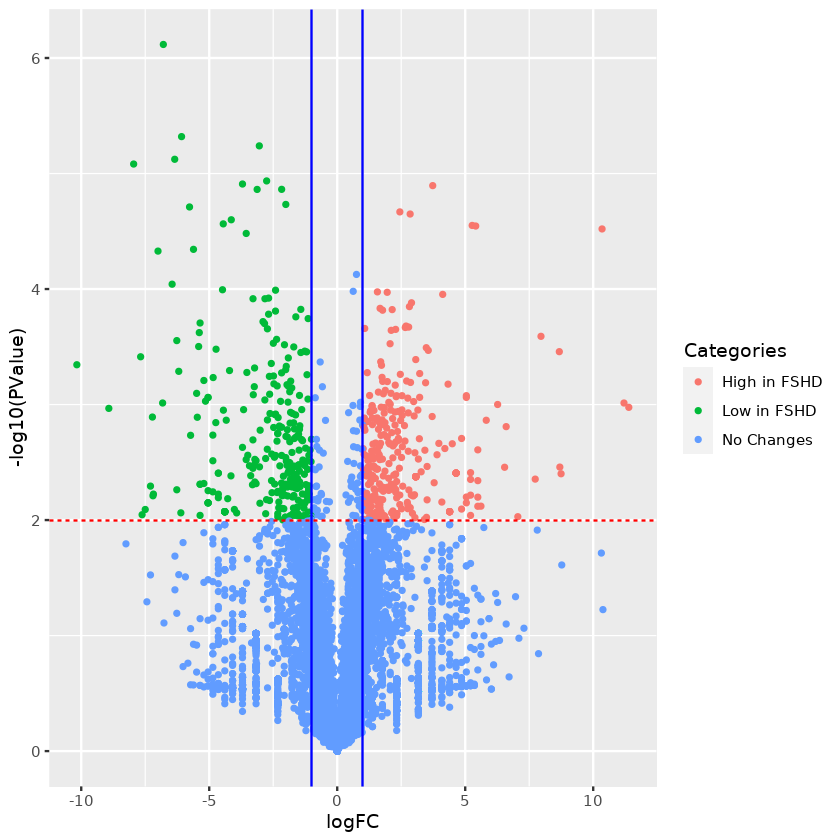

In [59]:
ggplot(plot_table, aes(x=logFC, y= -log10(PValue))) +
  geom_point(aes(colour = Categories), size=1) +
  geom_hline(yintercept=2, linetype="dashed", 
             color = "red", size=0.5) +
  geom_vline(xintercept=1, color = "blue", size=0.5) +
  geom_vline(xintercept=-1, color = "blue", size=0.5) 
  

#### Add titles and labels

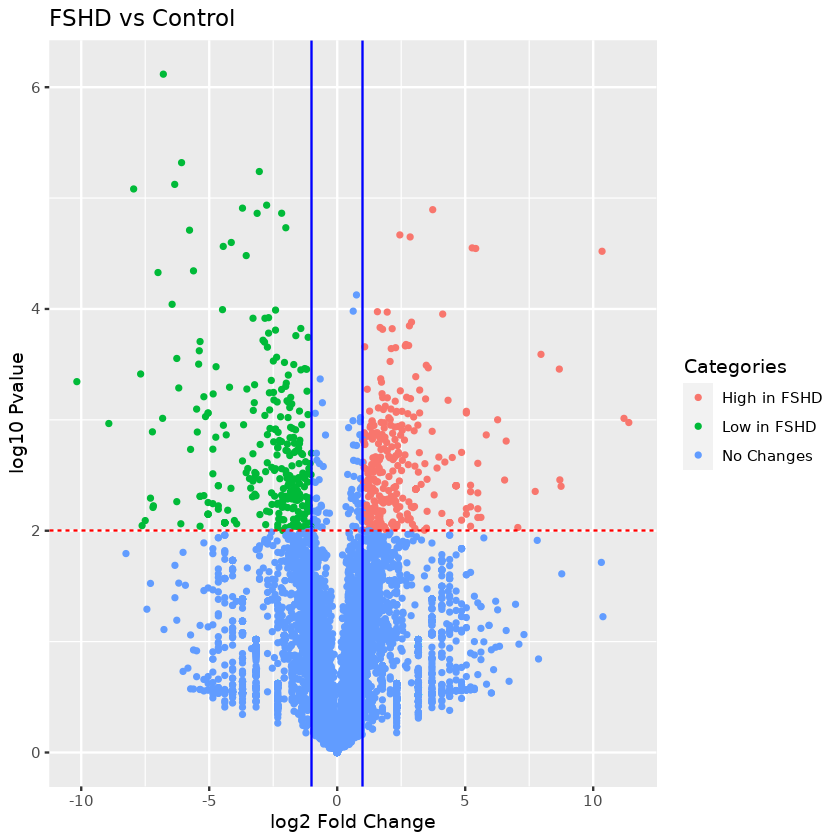

In [60]:
ggplot(plot_table, aes(x=logFC, y= -log10(PValue))) +
  geom_point(aes(colour = Categories), size=1) +
  geom_hline(yintercept=2, linetype="dashed", 
             color = "red", size=0.5) +
  geom_vline(xintercept=1, color = "blue", size=0.5) +
  geom_vline(xintercept=-1, color = "blue", size=0.5) +
  ggtitle("FSHD vs Control") +
  xlab("log2 Fold Change") + ylab("log10 Pvalue")

#### Add theme to make the plot looks nicer

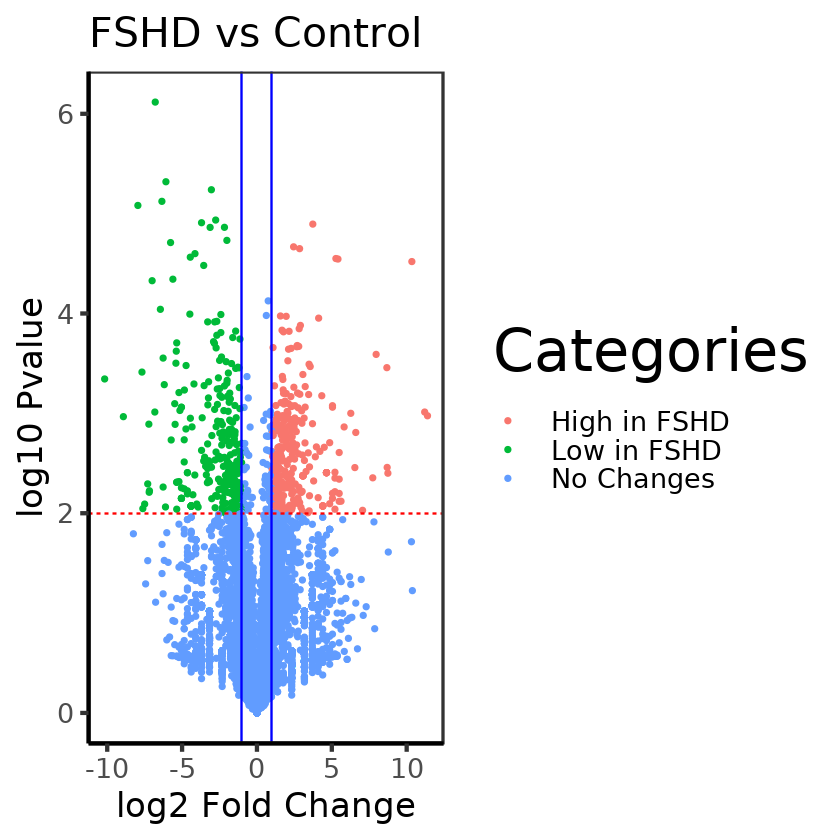

In [61]:
ggplot(plot_table, aes(x=logFC, y= -log10(PValue))) +
  geom_point(aes(colour = Categories), size=1) +
  geom_hline(yintercept=2, linetype="dashed", 
             color = "red", size=0.5) +
  geom_vline(xintercept=1, color = "blue", size=0.5) +
  geom_vline(xintercept=-1, color = "blue", size=0.5) +
  ggtitle("FSHD vs Control") +
  xlab("log2 Fold Change") + ylab("log10 Pvalue") +
  theme_bw(base_size = 20) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.title = element_text(size=35),
  panel.background = element_blank(), axis.line = element_line(colour = "black"))

#### Add manual colors

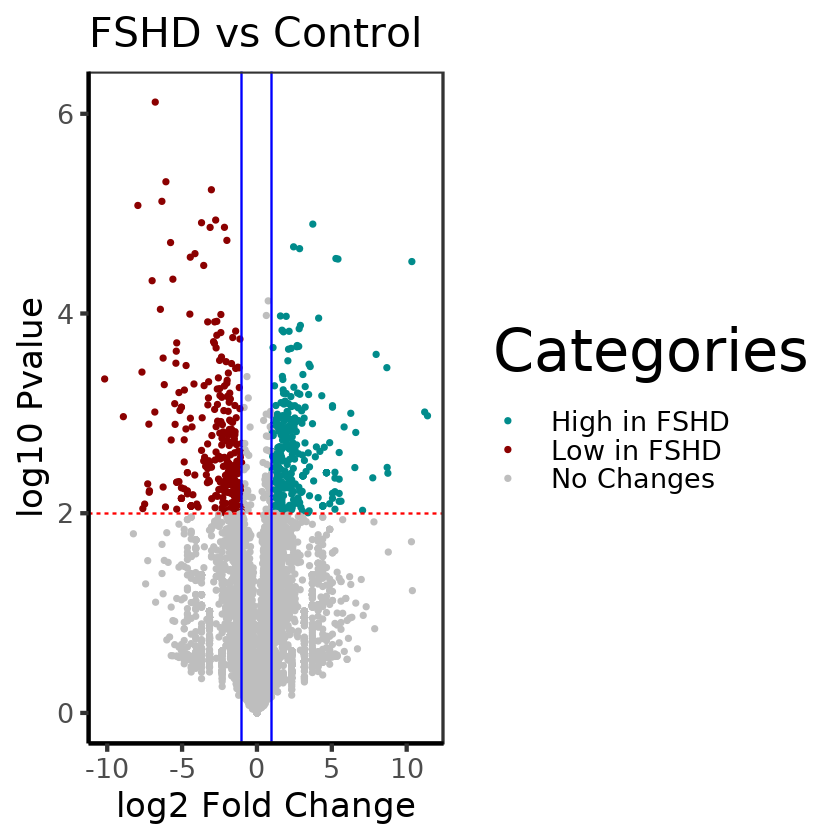

In [62]:
ggplot(plot_table, aes(x=logFC, y= -log10(PValue))) +
  geom_point(aes(colour = Categories), size=1) +
  geom_hline(yintercept=2, linetype="dashed", 
             color = "red", size=0.5) +
  geom_vline(xintercept=1, color = "blue", size=0.5) +
  geom_vline(xintercept=-1, color = "blue", size=0.5) +
  ggtitle("FSHD vs Control") +
  xlab("log2 Fold Change") + ylab("log10 Pvalue") +
  theme_bw(base_size = 20) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.title = element_text(size=35),
  panel.background = element_blank(), axis.line = element_line(colour = "black")) +
  scale_colour_manual(values = c("High in FSHD"= "darkcyan", "Low in FSHD"="darkred","No Changes"= "grey")) 

#### Label genes of interest 

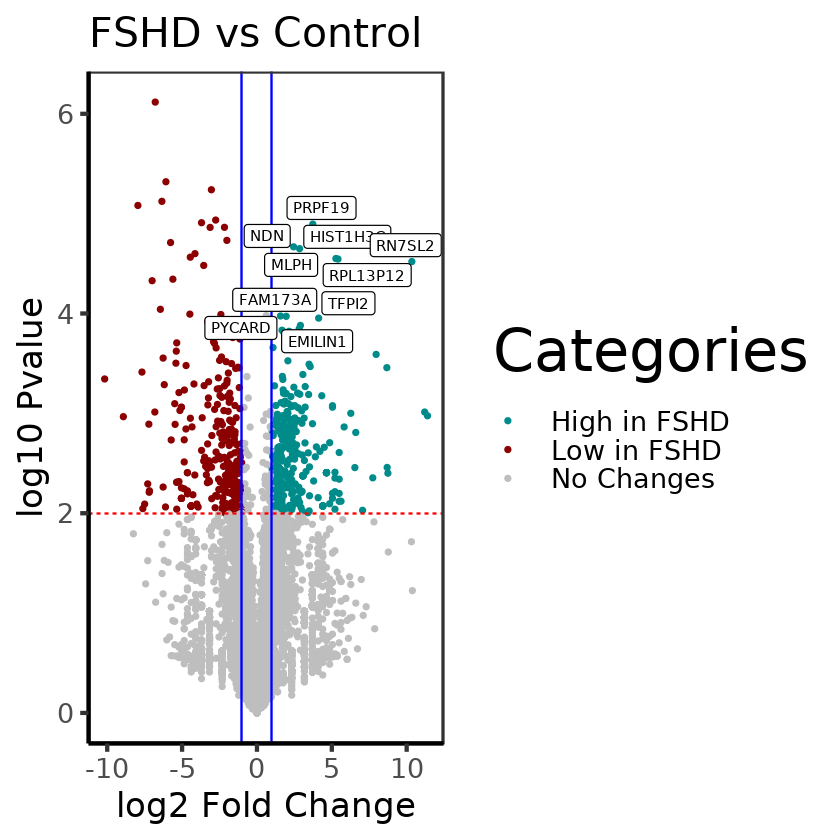

In [63]:
### Store genes in a vector for labeing
vc_labels <- head(Control_3_up,10)
plot_table$genes <- rownames(plot_table)
### Plot
ggplot(plot_table, aes(x=logFC, y= -log10(PValue),label = genes)) +
  geom_point(aes(colour = Categories), size=1) +
  geom_hline(yintercept=2, linetype="dashed", 
             color = "red", size=0.5) +
  geom_vline(xintercept=1, color = "blue", size=0.5) +
  geom_vline(xintercept=-1, color = "blue", size=0.5) +
  ggtitle("FSHD vs Control") +
  xlab("log2 Fold Change") + ylab("log10 Pvalue") +
  theme_bw(base_size = 20) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.title = element_text(size=35),
  panel.background = element_blank(), axis.line = element_line(colour = "black")) +
  scale_colour_manual(values = c("High in FSHD"= "darkcyan", "Low in FSHD"="darkred","No Changes"= "grey")) +
  geom_label_repel(data= subset(plot_table, genes %in% vc_labels),segment.color = "blue",
                    direction     = "both", size = 3,
                   box.padding   = 0.1,force  = 4,
                   point.padding = 0.1,max.time=10,max.overlaps = Inf)

In [64]:
ggsave(file = "Volcano_Control_3_up.pdf",
    width = 10, 
    height = 7)
dev.off()

null device 
          1

# Exercise 3

### Plot volcano plot for genes upregulated in FSHD2 Day3 compared to Day0

# Gene Ontology

### We use [enrichR](https://cran.r-project.org/web/packages/enrichR/vignettes/enrichR.html), which also has a [web tool](https://maayanlab.cloud/Enrichr/).

In [67]:
library(enrichR)

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!



In [68]:
dbs <- c("GO_Molecular_Function_2021", "GO_Cellular_Component_2021", "GO_Biological_Process_2021")
enriched <- enrichr(Control_3_up, dbs)

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


In [69]:
head(enriched[["GO_Biological_Process_2021"]])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,positive regulation of endothelial cell migration (GO:0010595),8/86,7.307282e-06,0.01077093,0,0,8.975043,106.1446,TGFB1;RRAS;ZNF580;ANXA3;ZC3H12A;GATA3;RHOB;FGFR1
2,regulation of collagen biosynthetic process (GO:0032965),4/19,6.063801e-05,0.04469021,0,0,23.000873,223.3520,TGFB1;F2R;EMILIN1;LARP6
3,cortical cytoskeleton organization (GO:0030865),5/41,1.094282e-04,0.04587602,0,0,12.019371,109.6196,FHOD1;RAC2;RHOD;LLGL1;RHOB
4,positive regulation of extracellular matrix assembly (GO:1901203),3/9,1.244940e-04,0.04587602,0,0,42.958696,386.2525,PHLDB1;TGFB1;EMILIN1
5,negative regulation of gene silencing by miRNA (GO:0060965),3/12,3.177242e-04,0.07805424,0,0,28.634783,230.6339,NCOR2;TGFB1;ZC3H12A
6,negative regulation of production of miRNAs involved in gene silencing by miRNA (GO:1903799),3/12,3.177242e-04,0.07805424,0,0,28.634783,230.6339,NCOR2;TGFB1;ZC3H12A


In [ ]:
plotEnrich(enriched[[3]], showTerms = 20, numChar = 40, y = "Count", orderBy = "P.value")

In [88]:
library(ComplexHeatmap)
df <- subset(tpm, row.names(tpm) %in% head(Control_3_up,50))
head(df)

,Control_78_Day_0_Rep3,Control_78_Day_0_Rep4,Control_78_Day_3_Rep1,Control_78_Day_3_Rep2,FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep2,FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep2
FABP3,22,27,791,750,1,1,416,491
MYBPH,167,179,5144,4636,1,3,1764,2311
ACTN2,25,28,1194,1183,0,1,334,476
MAPRE3,3,4,169,173,3,5,50,82
MYL1,20,17,4519,4082,0,0,187,298
KLHL40,1,1,101,92,0,1,15,22


In [89]:
df.l <- log2(df+1)

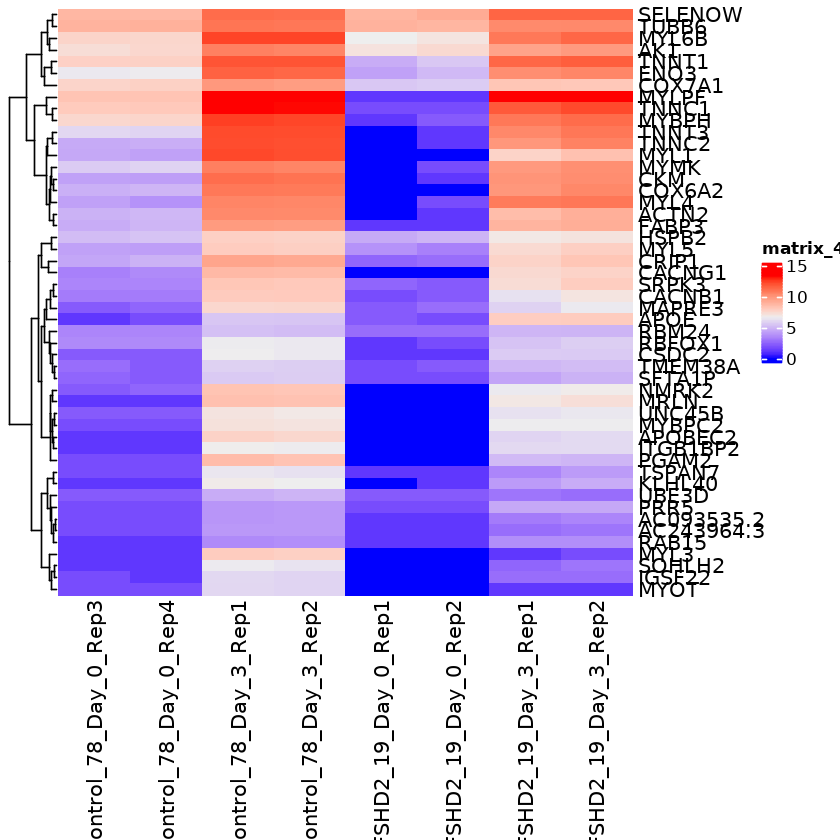

In [90]:
Heatmap(as.matrix(df.l),cluster_columns = FALSE)

In [81]:
head(meta,8)

,Sample,Timepoint,Genotype,Replicate
,<chr>,<chr>,<chr>,<chr>
Control_78_Day_0_Rep3,Control_78_Day_0_Rep3,0,Control,Rep3
Control_78_Day_0_Rep4,Control_78_Day_0_Rep4,0,Control,Rep4
Control_78_Day_3_Rep1,Control_78_Day_3_Rep1,3,Control,Rep1
Control_78_Day_3_Rep2,Control_78_Day_3_Rep2,3,Control,Rep2
FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep1,0,FSHD2,Rep1
FSHD2_19_Day_0_Rep2,FSHD2_19_Day_0_Rep2,0,FSHD2,Rep2
FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep1,3,FSHD2,Rep1
FSHD2_19_Day_3_Rep2,FSHD2_19_Day_3_Rep2,3,FSHD2,Rep2


In [91]:
top_anno = HeatmapAnnotation(Cell_Type = meta$Genotype,
  Differentiation= meta$Timepoint,
  col = list(Cell_Type = c("Control" = "darkgreen","FSHD2"="orange"),
  Differentiation = c("0" = "black","3"="grey")))

In [123]:
options(repr.plot.width = 7, repr.plot.height = 12)

In [132]:
# Call the pdf command to start the plot
pdf(file = "Heatmap.pdf",   # The directory you want to save the file in
    width = 8, # The width of the plot in inches
    height = 10) # The height of the plot in inches

# Create the plot with R code

Heatmap(as.matrix(df.l),cluster_columns = FALSE,top_annotation = top_anno)

# Run dev.off() to create the file!
dev.off()

png 
  2